In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils import GC
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import gget
import random
from dna_features_viewer import GraphicFeature, GraphicRecord

In [37]:
features_in_target_region = pd.read_csv("aldh1l2_gene_target_region.csv")
features_in_target_region

,Gene stable ID,Gene end (bp),Gene start (bp)
0,ENSPSIG00000016855,4069176,4029282


In [61]:
features = []
features_wo_labels = []
hit_features = []

feature_colors = plt.cm.get_cmap("Set3")

# add annotated genes to features
for index, gene in features_in_target_region.iterrows():
    feature = GraphicFeature(start=gene["Gene start (bp)"], end=gene["Gene end (bp)"], color=feature_colors(((index + 77) % 16)), label=gene["Gene stable ID"])
    features.append(feature)
    
    feature_wo_label = GraphicFeature(start=gene["Gene start (bp)"], end=gene["Gene end (bp)"], color=feature_colors(((index + 77) % 16)), label=None)
    features_wo_labels.append(feature_wo_label)

In [62]:
outfmt_header = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"]
blastx_result = pd.read_csv("pelodiscus_sinensis_ENSG00000136010.out", sep="\t", header=None, names=outfmt_header)

start = int(blastx_result.loc[0, "qseqid"].split(":")[3])
end = int(blastx_result.loc[0, "qseqid"].split(":")[4])

# add most common hits to features
for i in range(0, 10):
    best_hits = pd.DataFrame(blastx_result.groupby("sseqid").nth(i))
    hit_start = best_hits["qstart"].mode()[0]
    hit_end = best_hits["qend"].mode()[0]
    hit_start = (start + hit_start)
    hit_end = (start + hit_end)

    feature = GraphicFeature(start=hit_start, end=hit_end, color=feature_colors(8), label="Hit")
    features.append(feature)
    
    if (hit_start > gene_start) & (hit_end < gene_end):
        hit_feature = GraphicFeature(start=hit_start-gene_start, end=hit_end-gene_start, color=feature_colors(8), label="Hit")
        hit_features.append(hit_feature)

    feature_wo_label = GraphicFeature(start=hit_start, end=hit_end, color=feature_colors(8), label=None)
    features_wo_labels.append(feature_wo_label)

In [63]:
hit_features

[GF(Hit, 14376-14612 ),
 GF(Hit, 16534-16719 ),
 GF(Hit, 31073-31282 ),
 GF(Hit, 24698-24844 ),
 GF(Hit, 7840-7980 ),
 GF(Hit, 33896-34015 )]

In [64]:
# features_wo_labels

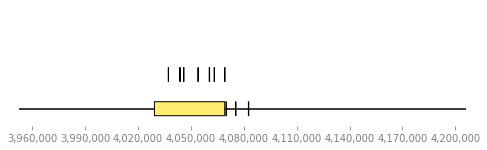

In [50]:
record = GraphicRecord(first_index=start, sequence_length=(end-start), features=features_wo_labels)
record.plot();

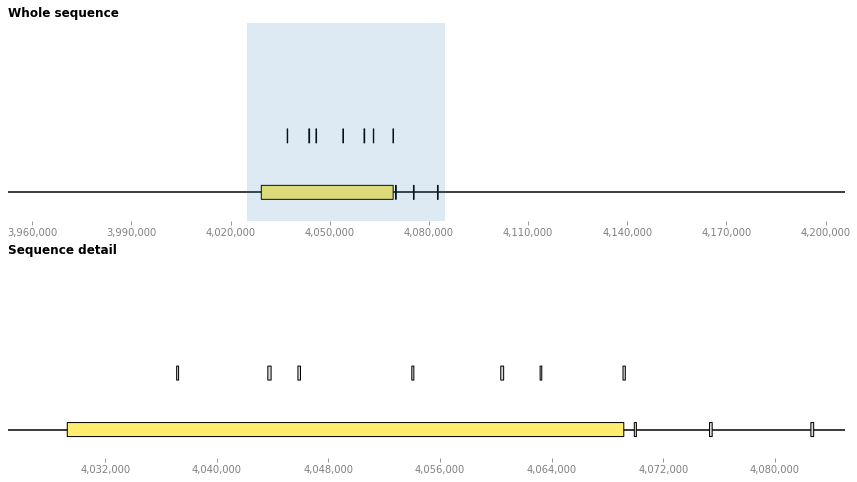

In [53]:
record = GraphicRecord(first_index=start, sequence_length=(end-start), features=features_wo_labels)

zoom_start, zoom_end = 4025000, 4085000
cropped_record = record.crop((zoom_start, zoom_end))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

ax1.set_title("Whole sequence", loc='left', weight='bold')
record.plot(ax=ax1)
ax1.fill_between((zoom_start, zoom_end), +1000, -1000, alpha=0.15)

cropped_record.plot(ax=ax2)

ax2.set_title("Sequence detail", loc='left', weight='bold');
plt.savefig("rft1_more_hits_wo_labels.png")

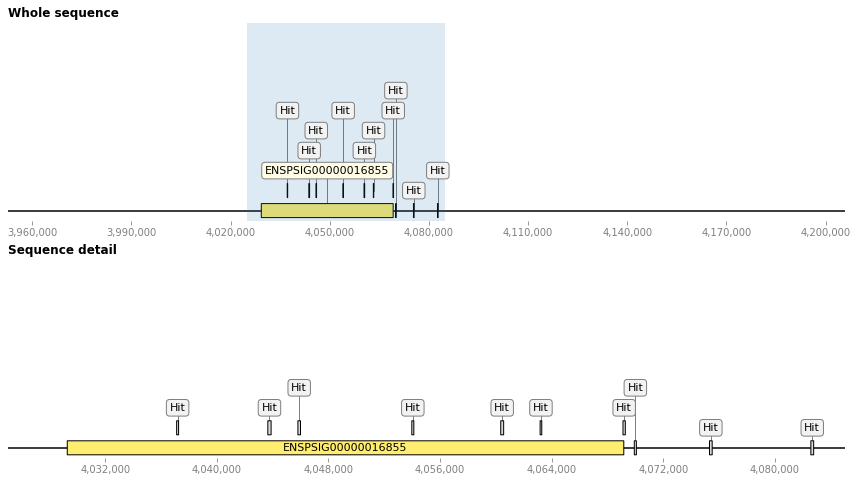

In [54]:
record = GraphicRecord(first_index=start, sequence_length=(end-start), features=features)

cropped_record = record.crop((zoom_start, zoom_end))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

ax1.set_title("Whole sequence", loc='left', weight='bold')
record.plot(ax=ax1)
ax1.fill_between((zoom_start, zoom_end), +1000, -1000, alpha=0.15)

cropped_record.plot(ax=ax2)

ax2.set_title("Sequence detail", loc='left', weight='bold');
plt.savefig("rft1_more_hits.png")

In [280]:
feature_colors(0)

(0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0)

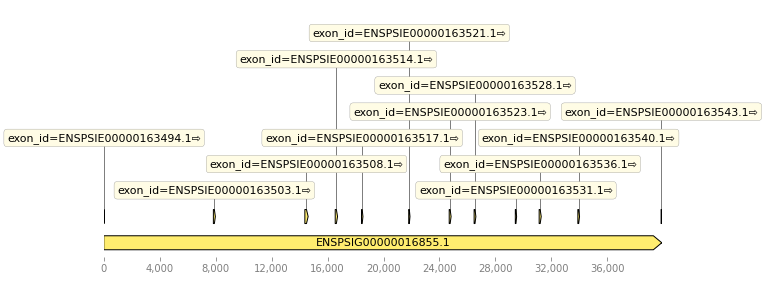

In [65]:
from dna_features_viewer import BiopythonTranslator
class MyCustomTranslator(BiopythonTranslator):
    default_feature_color = feature_colors(11)


graphic_record = MyCustomTranslator().translate_record("ENSPSIG00000016855.gb")
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7, annotate_inline=True)

In [66]:
gene_start = 4029282
hit_color = feature_colors(8)

for feature in hit_features:
    graphic_record.features.append(feature)

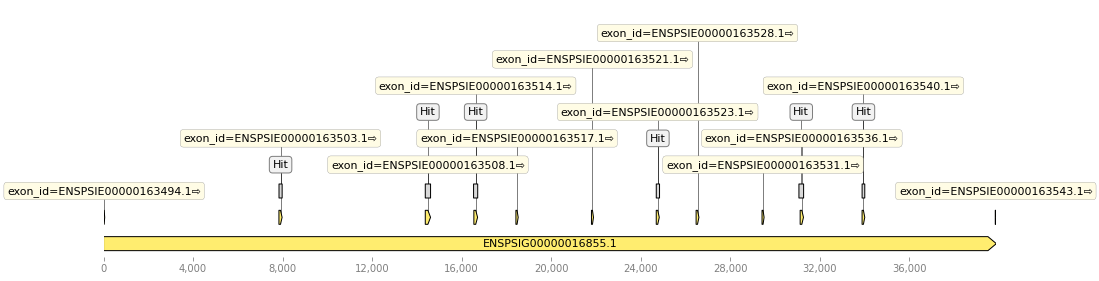

In [67]:
ax, _ = graphic_record.plot(figure_width=16, strand_in_label_threshold=7, annotate_inline=True)

In [60]:
gene_start = 4029282
gene_end = 4069176